# Gene expression matriz preparation

Made by: Cynthia Soto <br>
Date: March 8th 2021 <br>
Last md: April 1 2021  <br>

Zeamay B73M P717: data quantified with Cufflink  <br>
Datatype: transcriptome, expression profiles.  <br>
Normalized unit: FPKM.
<br>

**Workflow:** <br>
1) Basic stats<br>
2) Elimination of zeros thru all samples  <br>
3) Normalization: Log2(FPKM) <br>
4) Building on diferent expr. matrix.  <br>

In [1]:
# Libraries required
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
try:
    # Change the current working Directory      
    os.chdir("/home/cyntsc/Proyectos/tesis-code/zeamay_B73Mp717/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")    
s_path = str(os.getcwd())+'/*_Log2.csv'       
#print(os.listdir(os.getcwd())      

Directory changed: /home/cyntsc/Proyectos/tesis-code/zeamay_B73Mp717


In [3]:
file = "ZeaMay_Marzo2021.txt"   # Ultima actualizacion proporcionada por la Dra. Elsa G (se renombraron genes con ID duplicado)
df1=pd.read_csv(file, header=0, sep='\t') ##, nrows=100

In [4]:
df1.head(3)

,#,B73_28dpi_Control,B73_2dpi_Control,Mp717_0dpi_Control,Mp717_2dpi_Control,B73_2dpi_PH1,Mp717_2dpi_PH1,B73_14dpi_Control,Mp717_14dpi_Control,B73_14dpi_PH1,...,Mp717_14dpi_Control.1,B73_14dpi_PH1.1,Mp717_14dpi_PH1.1,B73_28dpi_PH1,Mp717_28dpi_PH1,B73_28dpi_Control.1,Mp717_28dpi_Control.1,B73_28dpi_PH1.1,Mp717_28dpi_PH1.1,B73_0dpi_Control.1
0,Zm00001d007725,0.0000,0.191728,0.0000,0.101295,0.122258,4.901840,0.903068,1.951550,0.000000,...,0.274646,0.288917,4.057280,19.8807,0.038804,8.86523,0.196945,30.6312,0.720097,1.42661
1,Zm00001d007718,37.8086,574.842000,78.6856,862.920000,64.604000,816.419000,237.270000,567.740000,171.666000,...,264.460000,51.300600,344.713000,341.3790,86.575100,337.71800,59.584500,444.4990,56.611600,608.31200
2,Zm00001d007717,0.0000,0.000000,0.0000,0.000000,0.016839,0.041654,0.024876,0.059003,0.055234,...,0.017459,0.064849,0.048829,0.0000,0.024051,0.00000,0.059184,0.0000,0.000000,0.00000


In [5]:
df1.shape

(34447, 29)

#### Transform FPKM in Log2 scale

In [6]:
## Get the columns to be transformed
col_name = df1.columns.to_list()
col_name
## delete the columns not useful. Last and first elements in the list
# col_name.pop()
# col_name.pop(0)
# print(len(col_name))
# col_name

['#',
 'B73_28dpi_Control',
 'B73_2dpi_Control',
 'Mp717_0dpi_Control',
 'Mp717_2dpi_Control',
 'B73_2dpi_PH1',
 'Mp717_2dpi_PH1',
 'B73_14dpi_Control',
 'Mp717_14dpi_Control',
 'B73_14dpi_PH1',
 'Mp717_14dpi_PH1',
 'B73_0dpi_Control',
 'Mp717_28dpi_Control',
 'B73_2dpi_Control.1',
 'Mp717_0dpi_Control.1',
 'Mp717_2dpi_Control.1',
 'B73_2dpi_PH1.1',
 'Mp717_2dpi_PH1.1',
 'B73_14dpi_Control.1',
 'Mp717_14dpi_Control.1',
 'B73_14dpi_PH1.1',
 'Mp717_14dpi_PH1.1',
 'B73_28dpi_PH1',
 'Mp717_28dpi_PH1',
 'B73_28dpi_Control.1',
 'Mp717_28dpi_Control.1',
 'B73_28dpi_PH1.1',
 'Mp717_28dpi_PH1.1',
 'B73_0dpi_Control.1']

In [7]:
## Plus 1 to avoid arithmetical error and apply Log2 transformation (avoid error div/0)
for column in df1.select_dtypes(include = [np.number]).columns:
#for column in col_name:
    #print(column)
    df1[column] += 1
    ## Apply Log2 numpy function to absolute values and add a column
    df1[column] = np.log2(df1[column])


df1.head(5)

,#,B73_28dpi_Control,B73_2dpi_Control,Mp717_0dpi_Control,Mp717_2dpi_Control,B73_2dpi_PH1,Mp717_2dpi_PH1,B73_14dpi_Control,Mp717_14dpi_Control,B73_14dpi_PH1,...,Mp717_14dpi_Control.1,B73_14dpi_PH1.1,Mp717_14dpi_PH1.1,B73_28dpi_PH1,Mp717_28dpi_PH1,B73_28dpi_Control.1,Mp717_28dpi_Control.1,B73_28dpi_PH1.1,Mp717_28dpi_PH1.1,B73_0dpi_Control.1
0,Zm00001d007725,0.000000,0.253055,0.000000,0.139201,0.166404,2.561165,0.928327,1.561473,0.000000,...,0.350097,0.366159,2.338362,4.384098,0.054924,3.302353,0.259357,4.983276,0.782490,1.278942
1,Zm00001d007718,5.278304,9.169529,6.316247,9.754754,6.035712,9.674932,7.896454,9.151625,7.431840,...,8.052351,5.708756,8.433431,8.419450,6.452449,8.403941,5.920877,8.799278,5.848287,9.251037
2,Zm00001d007717,0.000000,0.000000,0.000000,0.000000,0.024091,0.058877,0.035450,0.082707,0.077563,...,0.024971,0.090648,0.068780,0.000000,0.034288,0.000000,0.082953,0.000000,0.000000,0.000000
3,Zm00001d007716,2.335886,1.317703,1.094905,1.051393,1.345947,2.075166,1.454239,1.233127,1.562460,...,1.293200,2.629590,0.672127,2.022616,1.196305,2.109829,1.188793,0.839000,1.258579,0.713479
4,Zm00001d018986,4.753460,5.501713,4.680538,5.231436,4.651706,4.741871,4.846894,4.964930,5.087055,...,5.180601,5.813437,4.655392,5.199174,5.200708,5.558770,4.814089,5.586380,4.797532,5.058550


In [17]:
df1.columns

Index(['Gene', 'B73_28dpi_Control', 'B73_2dpi_Control', 'Mp717_0dpi_Control',
       'Mp717_2dpi_Control', 'B73_2dpi_PH1', 'Mp717_2dpi_PH1',
       'B73_14dpi_Control', 'Mp717_14dpi_Control', 'B73_14dpi_PH1',
       'Mp717_14dpi_PH1', 'B73_0dpi_Control', 'Mp717_28dpi_Control',
       'B73_2dpi_Control.1', 'Mp717_0dpi_Control.1', 'Mp717_2dpi_Control.1',
       'B73_2dpi_PH1.1', 'Mp717_2dpi_PH1.1', 'B73_14dpi_Control.1',
       'Mp717_14dpi_Control.1', 'B73_14dpi_PH1.1', 'Mp717_14dpi_PH1.1',
       'B73_28dpi_PH1', 'Mp717_28dpi_PH1', 'B73_28dpi_Control.1',
       'Mp717_28dpi_Control.1', 'B73_28dpi_PH1.1', 'Mp717_28dpi_PH1.1',
       'B73_0dpi_Control.1'],
      dtype='object')

In [8]:
df1.B73_0dpi_Control.sum()       ##Res=87999.50630716332

87999.50630716332

In [9]:
df1.rename(columns={'#': 'Gene'}, inplace=True)
df1.head(3)

,Gene,B73_28dpi_Control,B73_2dpi_Control,Mp717_0dpi_Control,Mp717_2dpi_Control,B73_2dpi_PH1,Mp717_2dpi_PH1,B73_14dpi_Control,Mp717_14dpi_Control,B73_14dpi_PH1,...,Mp717_14dpi_Control.1,B73_14dpi_PH1.1,Mp717_14dpi_PH1.1,B73_28dpi_PH1,Mp717_28dpi_PH1,B73_28dpi_Control.1,Mp717_28dpi_Control.1,B73_28dpi_PH1.1,Mp717_28dpi_PH1.1,B73_0dpi_Control.1
0,Zm00001d007725,0.000000,0.253055,0.000000,0.139201,0.166404,2.561165,0.928327,1.561473,0.000000,...,0.350097,0.366159,2.338362,4.384098,0.054924,3.302353,0.259357,4.983276,0.782490,1.278942
1,Zm00001d007718,5.278304,9.169529,6.316247,9.754754,6.035712,9.674932,7.896454,9.151625,7.431840,...,8.052351,5.708756,8.433431,8.419450,6.452449,8.403941,5.920877,8.799278,5.848287,9.251037
2,Zm00001d007717,0.000000,0.000000,0.000000,0.000000,0.024091,0.058877,0.035450,0.082707,0.077563,...,0.024971,0.090648,0.068780,0.000000,0.034288,0.000000,0.082953,0.000000,0.000000,0.000000


## Some statistic of the new matrix

1) Gene expression tvs files are integreted in one matrix<br>
2) GeneIDs with cero counts across all the samples are got it<br>

In [10]:
#df1.describe()
df_plot=df1.describe().T
df_plot

,count,mean,std,min,25%,50%,75%,max
B73_28dpi_Control,34447.0,2.465801,2.045384,0.0,0.433895,2.351959,4.027043,13.645253
B73_2dpi_Control,34447.0,2.507287,2.055197,0.0,0.454852,2.395765,4.069522,12.451149
Mp717_0dpi_Control,34447.0,2.441246,2.062521,0.0,0.374354,2.311991,4.011558,13.165942
Mp717_2dpi_Control,34447.0,2.583016,2.068113,0.0,0.537297,2.517707,4.152078,12.402133
B73_2dpi_PH1,34447.0,2.502278,2.105161,0.0,0.340434,2.403071,4.168313,14.021275
Mp717_2dpi_PH1,34447.0,2.405456,2.055958,0.0,0.371027,2.198350,3.965821,12.521905
B73_14dpi_Control,34447.0,2.540332,2.118839,0.0,0.405995,2.448420,4.158519,13.840316
Mp717_14dpi_Control,34447.0,2.479649,2.108481,0.0,0.372740,2.301833,4.100717,12.670997
B73_14dpi_PH1,34447.0,2.584270,2.037818,0.0,0.603891,2.573663,4.045832,13.703525
Mp717_14dpi_PH1,34447.0,2.508260,2.015180,0.0,0.504360,2.484811,3.992678,12.446789


In [11]:
df_plot.reset_index(level=0, inplace=True)
df_plot.rename(columns={'index': 'sample'}, inplace=True)

In [12]:
df_plot.head(5)

,sample,count,mean,std,min,25%,50%,75%,max
0,B73_28dpi_Control,34447.0,2.465801,2.045384,0.0,0.433895,2.351959,4.027043,13.645253
1,B73_2dpi_Control,34447.0,2.507287,2.055197,0.0,0.454852,2.395765,4.069522,12.451149
2,Mp717_0dpi_Control,34447.0,2.441246,2.062521,0.0,0.374354,2.311991,4.011558,13.165942
3,Mp717_2dpi_Control,34447.0,2.583016,2.068113,0.0,0.537297,2.517707,4.152078,12.402133
4,B73_2dpi_PH1,34447.0,2.502278,2.105161,0.0,0.340434,2.403071,4.168313,14.021275


In [13]:
# df_plot.sort_values(['sample'], ascending=[True], inplace=True)   
df_plot #.head(5)

,sample,count,mean,std,min,25%,50%,75%,max
0,B73_28dpi_Control,34447.0,2.465801,2.045384,0.0,0.433895,2.351959,4.027043,13.645253
1,B73_2dpi_Control,34447.0,2.507287,2.055197,0.0,0.454852,2.395765,4.069522,12.451149
2,Mp717_0dpi_Control,34447.0,2.441246,2.062521,0.0,0.374354,2.311991,4.011558,13.165942
3,Mp717_2dpi_Control,34447.0,2.583016,2.068113,0.0,0.537297,2.517707,4.152078,12.402133
4,B73_2dpi_PH1,34447.0,2.502278,2.105161,0.0,0.340434,2.403071,4.168313,14.021275
5,Mp717_2dpi_PH1,34447.0,2.405456,2.055958,0.0,0.371027,2.198350,3.965821,12.521905
6,B73_14dpi_Control,34447.0,2.540332,2.118839,0.0,0.405995,2.448420,4.158519,13.840316
7,Mp717_14dpi_Control,34447.0,2.479649,2.108481,0.0,0.372740,2.301833,4.100717,12.670997
8,B73_14dpi_PH1,34447.0,2.584270,2.037818,0.0,0.603891,2.573663,4.045832,13.703525
9,Mp717_14dpi_PH1,34447.0,2.508260,2.015180,0.0,0.504360,2.484811,3.992678,12.446789


In [14]:
#new = df_plot["sample"].str.split("_", n = 1, expand = True)    ## split 1 level
new = df_plot["sample"].str.split("_", n = 2, expand = True)     ## split 2 levels
new.head(5)

,0,1,2
0,B73,28dpi,Control
1,B73,2dpi,Control
2,Mp717,0dpi,Control
3,Mp717,2dpi,Control
4,B73,2dpi,PH1


In [15]:
# making separate first name column from new data frame 
df_plot[["spc","hpi","Treatement"]]= new[[0,1,2]]
df_plot.head(5)

,sample,count,mean,std,min,25%,50%,75%,max,spc,hpi,Treatement
0,B73_28dpi_Control,34447.0,2.465801,2.045384,0.0,0.433895,2.351959,4.027043,13.645253,B73,28dpi,Control
1,B73_2dpi_Control,34447.0,2.507287,2.055197,0.0,0.454852,2.395765,4.069522,12.451149,B73,2dpi,Control
2,Mp717_0dpi_Control,34447.0,2.441246,2.062521,0.0,0.374354,2.311991,4.011558,13.165942,Mp717,0dpi,Control
3,Mp717_2dpi_Control,34447.0,2.583016,2.068113,0.0,0.537297,2.517707,4.152078,12.402133,Mp717,2dpi,Control
4,B73_2dpi_PH1,34447.0,2.502278,2.105161,0.0,0.340434,2.403071,4.168313,14.021275,B73,2dpi,PH1


In [118]:
df_plot.sort_values(['spc','hpi'])
df_plot.head(29)

,sample,count,mean,std,min,25%,50%,75%,max,spc,hpi,Treatement
0,B73_28dpi_Control,34447.0,2.465801,2.045384,0.0,0.433895,2.351959,4.027043,13.645253,B73,28dpi,Control
1,B73_2dpi_Control,34447.0,2.507287,2.055197,0.0,0.454852,2.395765,4.069522,12.451149,B73,2dpi,Control
2,Mp717_0dpi_Control,34447.0,2.441246,2.062521,0.0,0.374354,2.311991,4.011558,13.165942,Mp717,0dpi,Control
3,Mp717_2dpi_Control,34447.0,2.583016,2.068113,0.0,0.537297,2.517707,4.152078,12.402133,Mp717,2dpi,Control
4,B73_2dpi_PH1,34447.0,2.502278,2.105161,0.0,0.340434,2.403071,4.168313,14.021275,B73,2dpi,PH1
5,Mp717_2dpi_PH1,34447.0,2.405456,2.055958,0.0,0.371027,2.198350,3.965821,12.521905,Mp717,2dpi,PH1
6,B73_14dpi_Control,34447.0,2.540332,2.118839,0.0,0.405995,2.448420,4.158519,13.840316,B73,14dpi,Control
7,Mp717_14dpi_Control,34447.0,2.479649,2.108481,0.0,0.372740,2.301833,4.100717,12.670997,Mp717,14dpi,Control
8,B73_14dpi_PH1,34447.0,2.584270,2.037818,0.0,0.603891,2.573663,4.045832,13.703525,B73,14dpi,PH1
9,Mp717_14dpi_PH1,34447.0,2.508260,2.015180,0.0,0.504360,2.484811,3.992678,12.446789,Mp717,14dpi,PH1


In [119]:
#df_plot.to_csv("results/basic_stats.csv")

(0.0, 15.0)

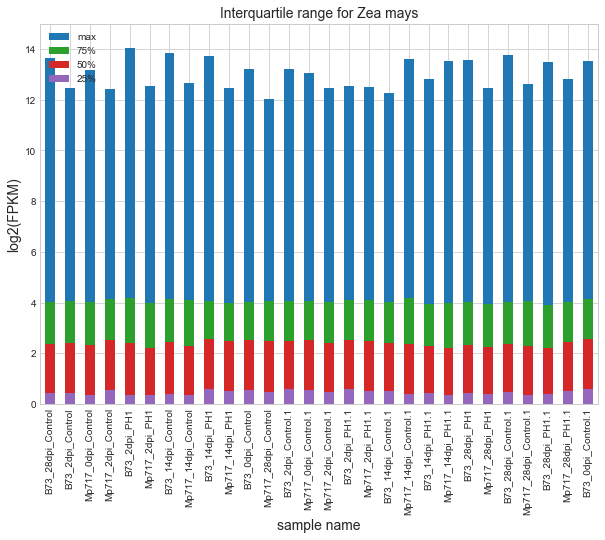

In [120]:
ax = df_plot.plot(x="sample", y="max", kind="bar",figsize=(10,7))
df_plot.plot(x="sample", y="75%", kind="bar", ax=ax, color="C2")
df_plot.plot(x="sample", y="50%", kind="bar", ax=ax, color="C3")
df_plot.plot(x="sample", y="25%", kind="bar", ax=ax, color="C4")
plt.title('Interquartile range for Zea mays',fontsize=14);
plt.Axes
plt.xlabel('sample name',fontsize=14);
plt.ylabel('log2(FPKM)',fontsize=14);
plt.ylim(0, 15)

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(-5.0, 0, 'B73_28dpi_Control.1'),
  Text(0.0, 0, 'B73_28dpi_Control'),
  Text(5.0, 0, 'Mp717_2dpi_PH1'),
  Text(10.0, 0, 'B73_0dpi_Control'),
  Text(15.0, 0, 'B73_2dpi_PH1.1'),
  Text(20.0, 0, 'Mp717_14dpi_PH1.1'),
  Text(25.0, 0, 'B73_28dpi_PH1.1'),
  Text(30.0, 0, '')])

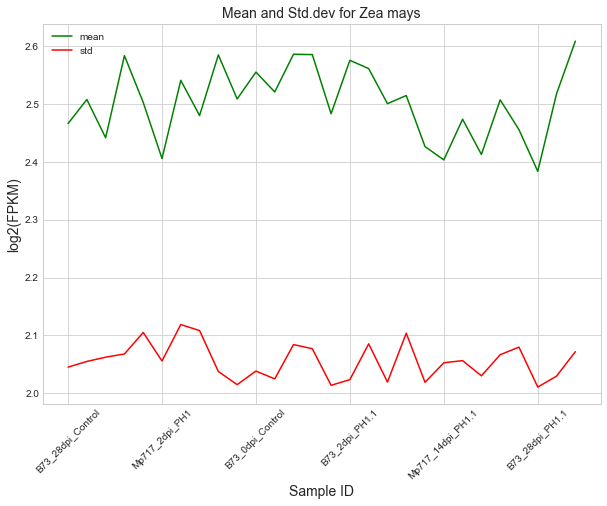

In [121]:
## gca stands for 'get current axis'
ax = plt.gca()
df_plot.plot(kind='line',x='sample',y='mean',color='green', ax=ax, figsize=(10,7))
df_plot.plot(kind='line',x='sample',y='std', color='red', ax=ax)
plt.title('Mean and Std.dev for Zea mays',fontsize=14);
plt.xlabel('Sample ID',fontsize=14);
plt.ylabel('log2(FPKM)',fontsize=14);
plt.xticks(rotation=45)

In [122]:
print(df_plot['std'].max())
print(df_plot['std'].min())

2.1188385151592635
2.0109478305411668


### Checking for genes with zeros across samples

In [123]:
df1.head(5)

,Gene,B73_28dpi_Control,B73_2dpi_Control,Mp717_0dpi_Control,Mp717_2dpi_Control,B73_2dpi_PH1,Mp717_2dpi_PH1,B73_14dpi_Control,Mp717_14dpi_Control,B73_14dpi_PH1,...,Mp717_14dpi_Control.1,B73_14dpi_PH1.1,Mp717_14dpi_PH1.1,B73_28dpi_PH1,Mp717_28dpi_PH1,B73_28dpi_Control.1,Mp717_28dpi_Control.1,B73_28dpi_PH1.1,Mp717_28dpi_PH1.1,B73_0dpi_Control.1
0,Zm00001d007725,0.000000,0.253055,0.000000,0.139201,0.166404,2.561165,0.928327,1.561473,0.000000,...,0.350097,0.366159,2.338362,4.384098,0.054924,3.302353,0.259357,4.983276,0.782490,1.278942
1,Zm00001d007718,5.278304,9.169529,6.316247,9.754754,6.035712,9.674932,7.896454,9.151625,7.431840,...,8.052351,5.708756,8.433431,8.419450,6.452449,8.403941,5.920877,8.799278,5.848287,9.251037
2,Zm00001d007717,0.000000,0.000000,0.000000,0.000000,0.024091,0.058877,0.035450,0.082707,0.077563,...,0.024971,0.090648,0.068780,0.000000,0.034288,0.000000,0.082953,0.000000,0.000000,0.000000
3,Zm00001d007716,2.335886,1.317703,1.094905,1.051393,1.345947,2.075166,1.454239,1.233127,1.562460,...,1.293200,2.629590,0.672127,2.022616,1.196305,2.109829,1.188793,0.839000,1.258579,0.713479
4,Zm00001d018986,4.753460,5.501713,4.680538,5.231436,4.651706,4.741871,4.846894,4.964930,5.087055,...,5.180601,5.813437,4.655392,5.199174,5.200708,5.558770,4.814089,5.586380,4.797532,5.058550


In [124]:
## Check number of zeros by sample
sr_ceros = df1.isin([0]).sum()
type(sr_ceros)
## transform the pandas serie into a pandas df
df_ceros = sr_ceros.to_frame()
## format the df
df_ceros.columns = df_ceros.iloc[0]
df_ceros = df_ceros.drop(df_ceros.index[0])

In [125]:
df_ceros.head()

Gene,0
B73_28dpi_Control,3956
B73_2dpi_Control,3832
Mp717_0dpi_Control,4167
Mp717_2dpi_Control,3801
B73_2dpi_PH1,4315


In [126]:
#df_ceros.to_csv("results/zeros_by_sample.csv",index=True, header=True)

***Here, zeros are counted by genes across all samples & a new column with the zero-counter values is appended at the matrix*** <br>
In consequence, several matrix containing a variable number of genes with zeros will be created as necessary. <br>
all_log2_counter_cero.csv contains the counter <br>


In [127]:
s_zeros=(df1 == 0).astype(int).sum(axis=1)
## Added a column to df1 with the counter of zeros
df1['zero-counter'] = s_zeros
df1
## Send the new matrix to all_log2_counter_cero.csv 
#df1.to_csv('matrix/all_genes_counterOFzeros.csv', sep='\t', index=True)

,Gene,B73_28dpi_Control,B73_2dpi_Control,Mp717_0dpi_Control,Mp717_2dpi_Control,B73_2dpi_PH1,Mp717_2dpi_PH1,B73_14dpi_Control,Mp717_14dpi_Control,B73_14dpi_PH1,...,B73_14dpi_PH1.1,Mp717_14dpi_PH1.1,B73_28dpi_PH1,Mp717_28dpi_PH1,B73_28dpi_Control.1,Mp717_28dpi_Control.1,B73_28dpi_PH1.1,Mp717_28dpi_PH1.1,B73_0dpi_Control.1,zero-counter
0,Zm00001d007725,0.000000,0.253055,0.000000,0.139201,0.166404,2.561165,0.928327,1.561473,0.000000,...,0.366159,2.338362,4.384098,0.054924,3.302353,0.259357,4.983276,0.782490,1.278942,5
1,Zm00001d007718,5.278304,9.169529,6.316247,9.754754,6.035712,9.674932,7.896454,9.151625,7.431840,...,5.708756,8.433431,8.419450,6.452449,8.403941,5.920877,8.799278,5.848287,9.251037,0
2,Zm00001d007717,0.000000,0.000000,0.000000,0.000000,0.024091,0.058877,0.035450,0.082707,0.077563,...,0.090648,0.068780,0.000000,0.034288,0.000000,0.082953,0.000000,0.000000,0.000000,12
3,Zm00001d007716,2.335886,1.317703,1.094905,1.051393,1.345947,2.075166,1.454239,1.233127,1.562460,...,2.629590,0.672127,2.022616,1.196305,2.109829,1.188793,0.839000,1.258579,0.713479,0
4,Zm00001d018986,4.753460,5.501713,4.680538,5.231436,4.651706,4.741871,4.846894,4.964930,5.087055,...,5.813437,4.655392,5.199174,5.200708,5.558770,4.814089,5.586380,4.797532,5.058550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34442,Zm00001d031847_1,3.907016,4.568269,3.756991,4.373551,4.346219,4.299699,4.479450,3.717989,3.506983,...,3.365950,3.930889,3.728780,3.045826,3.641685,3.764665,4.097434,3.656096,3.923587,0
34443,Zm00001d013098_1,3.309326,3.907593,3.665222,5.718460,2.986773,5.024732,3.685514,4.322036,1.953612,...,2.114287,2.962790,2.824635,2.957833,3.012985,3.941416,3.107767,4.028171,4.986925,0
34444,Zm00001d033729,0.027785,0.166673,0.053507,0.175563,0.040533,0.033503,0.059485,0.062638,0.296853,...,0.033196,0.043487,0.078430,0.034380,0.080592,0.047373,0.063151,0.000000,0.050279,2
34445,Zm00001d032542,1.894585,3.863661,1.655109,3.076467,2.360985,3.084855,2.498861,2.333103,2.551171,...,2.085006,2.514807,3.537296,0.770253,3.050272,2.143465,2.845673,1.784119,3.195716,0


***Here, we look for genes with n number of ceros***

In [128]:
## Filter for looking rows with x number of ceros
is_zero = (df1['zero-counter']==28)     
df1_8 = df1[is_zero]
print(df1_8.shape)
#print(df1_8.head(7))
## Send the integrated matrix to all_log2_counter_cero.csv 
#df1_8.to_csv('results/all_genes_w28zeros.csv', sep='\t', index=True)

(967, 30)


In [129]:
df1_8.isin([0]).sum()
#len(df1_8.isin([0]).sum())

Gene                       0
B73_28dpi_Control        967
B73_2dpi_Control         967
Mp717_0dpi_Control       967
Mp717_2dpi_Control       967
B73_2dpi_PH1             967
Mp717_2dpi_PH1           967
B73_14dpi_Control        967
Mp717_14dpi_Control      967
B73_14dpi_PH1            967
Mp717_14dpi_PH1          967
B73_0dpi_Control         967
Mp717_28dpi_Control      967
B73_2dpi_Control.1       967
Mp717_0dpi_Control.1     967
Mp717_2dpi_Control.1     967
B73_2dpi_PH1.1           967
Mp717_2dpi_PH1.1         967
B73_14dpi_Control.1      967
Mp717_14dpi_Control.1    967
B73_14dpi_PH1.1          967
Mp717_14dpi_PH1.1        967
B73_28dpi_PH1            967
Mp717_28dpi_PH1          967
B73_28dpi_Control.1      967
Mp717_28dpi_Control.1    967
B73_28dpi_PH1.1          967
Mp717_28dpi_PH1.1        967
B73_0dpi_Control.1       967
zero-counter               0
dtype: int64

## Trimming of genes with cero counts
1) All data are cleaned and normalized to log2<br>
2) First soft trimming: remove gene-IDs counting cero across all samples<br>
<br>
x = Si - 1 <br>
<br>
Donde:<br>
Si = es el numero de cero conteos traves del todas las muestras para un gen determinado<br>
Ejm: si el tamaño del conjunto es de 8 muestras, entonces 8 es el número máximo de ceros que puede tener un gen, asumiendo que no hubo expresión de ese gen para ninguna de las muestra. <br>
x =   es Si  -1


In [130]:
## Save the gene IDs with ceros in a file 
genes_cero_ToList = list(df1_8['Gene'])
with open("results/all_geneIDs_with_zeros.csv", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))

In [131]:
genes_cero_ToList
len(genes_cero_ToList)
#df1_8.head()

967

In [132]:
## function to remove genes base on a list of indexes provided from a df

def df_drop_idx_list(df_idx, df_d):  #, df1_d

    ## get a list of gene idx to be remove provided in the df_idx 
    ## drop this idx list from the df provided (df_d)
    ## return the df with the idx provided removed
    
    ## Get the indexes of the gene rows to delete from the df provided
    lst_genes_to_drop=(df_idx.index)
    ## drop the idx marked    
    for i in lst_genes_to_drop: 
        try:
            df_d = df_d.drop([i])
        except:
            pass # doing nothing on exception, not processed because it is already dropped"
    
    return df_d 

In [133]:
# call the function  ==== df_drop_idx_list ==== to get the index of the genes to remove (df1_17) from the df1
df1 = df_drop_idx_list(df1_8, df1)

In [134]:
print(df1.shape)
df1.head(5)    

(33480, 30)


,Gene,B73_28dpi_Control,B73_2dpi_Control,Mp717_0dpi_Control,Mp717_2dpi_Control,B73_2dpi_PH1,Mp717_2dpi_PH1,B73_14dpi_Control,Mp717_14dpi_Control,B73_14dpi_PH1,...,B73_14dpi_PH1.1,Mp717_14dpi_PH1.1,B73_28dpi_PH1,Mp717_28dpi_PH1,B73_28dpi_Control.1,Mp717_28dpi_Control.1,B73_28dpi_PH1.1,Mp717_28dpi_PH1.1,B73_0dpi_Control.1,zero-counter
0,Zm00001d007725,0.000000,0.253055,0.000000,0.139201,0.166404,2.561165,0.928327,1.561473,0.000000,...,0.366159,2.338362,4.384098,0.054924,3.302353,0.259357,4.983276,0.782490,1.278942,5
1,Zm00001d007718,5.278304,9.169529,6.316247,9.754754,6.035712,9.674932,7.896454,9.151625,7.431840,...,5.708756,8.433431,8.419450,6.452449,8.403941,5.920877,8.799278,5.848287,9.251037,0
2,Zm00001d007717,0.000000,0.000000,0.000000,0.000000,0.024091,0.058877,0.035450,0.082707,0.077563,...,0.090648,0.068780,0.000000,0.034288,0.000000,0.082953,0.000000,0.000000,0.000000,12
3,Zm00001d007716,2.335886,1.317703,1.094905,1.051393,1.345947,2.075166,1.454239,1.233127,1.562460,...,2.629590,0.672127,2.022616,1.196305,2.109829,1.188793,0.839000,1.258579,0.713479,0
4,Zm00001d018986,4.753460,5.501713,4.680538,5.231436,4.651706,4.741871,4.846894,4.964930,5.087055,...,5.813437,4.655392,5.199174,5.200708,5.558770,4.814089,5.586380,4.797532,5.058550,0


### New stats of the filtered data

In [135]:
## Create a new file with ID genes with 8 ceros across all samples removed.
#df1.to_csv('matrix/all_28ceros_drop.csv', sep='\t', index=True)

In [136]:
## Get some stats of the new matrix filtered of zeros in common
df_tmp = df1.describe().T
df_tmp.drop(df_tmp.tail(1).index,inplace=True) # drop last 1 row containing the zero-counter
df_tmp 

,count,mean,std,min,25%,50%,75%,max
B73_28dpi_Control,33480.0,2.537021,2.030700,0.0,0.548745,2.458323,4.072723,13.645253
B73_2dpi_Control,33480.0,2.579705,2.039366,0.0,0.586088,2.510906,4.120501,12.451149
Mp717_0dpi_Control,33480.0,2.511756,2.049330,0.0,0.480856,2.420206,4.057990,13.165942
Mp717_2dpi_Control,33480.0,2.657621,2.049964,0.0,0.677764,2.626875,4.195724,12.402133
B73_2dpi_PH1,33480.0,2.574551,2.091322,0.0,0.449198,2.524608,4.211542,14.021275
Mp717_2dpi_PH1,33480.0,2.474932,2.043795,0.0,0.484253,2.304543,4.011914,12.521905
B73_14dpi_Control,33480.0,2.613705,2.104132,0.0,0.528554,2.557802,4.207581,13.840316
Mp717_14dpi_Control,33480.0,2.551269,2.095561,0.0,0.481719,2.408163,4.144599,12.670997
B73_14dpi_PH1,33480.0,2.658911,2.018459,0.0,0.762779,2.671952,4.087149,13.703525
Mp717_14dpi_PH1,33480.0,2.580706,1.997818,0.0,0.647406,2.590368,4.032903,12.446789


In [137]:
df_tmp.reset_index(level=0, inplace=True)
df_tmp.rename(columns={'index': 'sample'}, inplace=True)
df_tmp.head(5)

,sample,count,mean,std,min,25%,50%,75%,max
0,B73_28dpi_Control,33480.0,2.537021,2.030700,0.0,0.548745,2.458323,4.072723,13.645253
1,B73_2dpi_Control,33480.0,2.579705,2.039366,0.0,0.586088,2.510906,4.120501,12.451149
2,Mp717_0dpi_Control,33480.0,2.511756,2.049330,0.0,0.480856,2.420206,4.057990,13.165942
3,Mp717_2dpi_Control,33480.0,2.657621,2.049964,0.0,0.677764,2.626875,4.195724,12.402133
4,B73_2dpi_PH1,33480.0,2.574551,2.091322,0.0,0.449198,2.524608,4.211542,14.021275


In [138]:
df_tmp.sort_values(['sample'], ascending=[True], inplace=True)   

In [139]:
#df_tmp.to_csv("results/basic_stats_no_zeros.csv", index=False, header=True)

(0.0, 15.0)

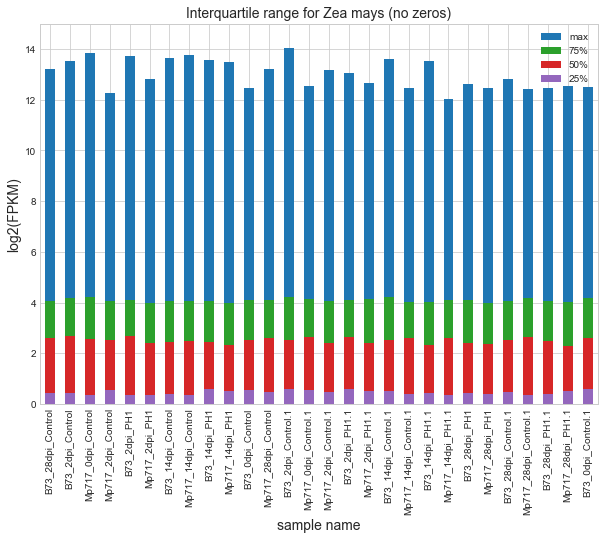

In [140]:
ax = df_tmp.plot(x="sample", y="max", kind="bar",figsize=(10,7))
df_tmp.plot(x="sample", y="75%", kind="bar", ax=ax, color="C2")
df_tmp.plot(x="sample", y="50%", kind="bar", ax=ax, color="C3")
df_plot.plot(x="sample", y="25%", kind="bar", ax=ax, color="C4")
plt.title('Interquartile range for Zea mays (no zeros)',fontsize=14);
plt.xlabel('sample name',fontsize=14);
plt.ylabel('log2(FPKM)',fontsize=14);
plt.ylim(0, 15)

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(-5.0, 0, 'Mp717_28dpi_PH1.1'),
  Text(0.0, 0, 'B73_0dpi_Control'),
  Text(5.0, 0, 'B73_14dpi_PH1.1'),
  Text(10.0, 0, 'B73_2dpi_Control'),
  Text(15.0, 0, 'Mp717_0dpi_Control.1'),
  Text(20.0, 0, 'Mp717_28dpi_Control'),
  Text(25.0, 0, 'Mp717_2dpi_Control.1'),
  Text(30.0, 0, '')])

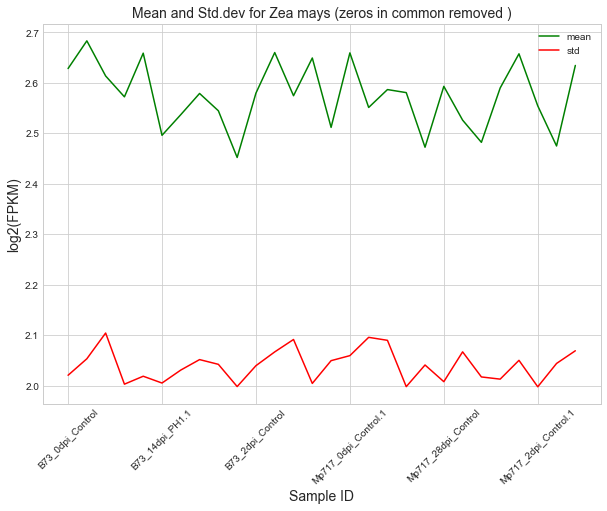

In [141]:
## gca stands for 'get current axis'
ax = plt.gca()

df_tmp.plot(kind='line',x='sample',y='mean',color='green', ax=ax, figsize=(10,7))
df_tmp.plot(kind='line',x='sample',y='std', color='red', ax=ax)
plt.title('Mean and Std.dev for Zea mays (zeros in common removed )',fontsize=14);
plt.xlabel('Sample ID',fontsize=14);
plt.ylabel('log2(FPKM)',fontsize=14);
plt.xticks(rotation=45)

In [142]:
print(df_tmp['std'].max())
print(df_tmp['std'].min())

2.1041318141499663
1.9975526957842882


### Now explore the new distributions without ceros across all samples
### Plot all the sample in one plot (histogram and KDE)

In [143]:
# load file to be plotted
print((os.getcwd()))
df_nozeros = pd.read_csv("matrix/all_28ceros_drop.csv", sep='\t')
## remove unnamed cols
df_nozeros.drop(df_nozeros.columns[df_nozeros.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
# dropping not-useful columns 
df_nozeros.drop(["Gene", "zero-counter"], axis = 1, inplace = True) 
#print(df_nozeros.head(3))

## Get sample list names
sample_lst=df_nozeros.columns
#print(sample_lst)

/home/cyntsc/Proyectos/tesis-code/zeamay_B73Mp717


Plot both the histogram and densities in the same plot with the seaborn package (imported as sns) which allows you to do that via the distplot(). 
Since seaborn is built on top of matplotlib, you can use the sns and plt one after the other.

###  Adding labels for plotting (leyends)

In [144]:
sample_lst = df_tmp["sample"].tolist()
#sample_lst

In [145]:
#df_nozeros
sample_data = df_nozeros['B73_28dpi_Control'].tolist()
sample_data
print(max(sample_data))
print(min(sample_data))

13.645253124064734
0.0


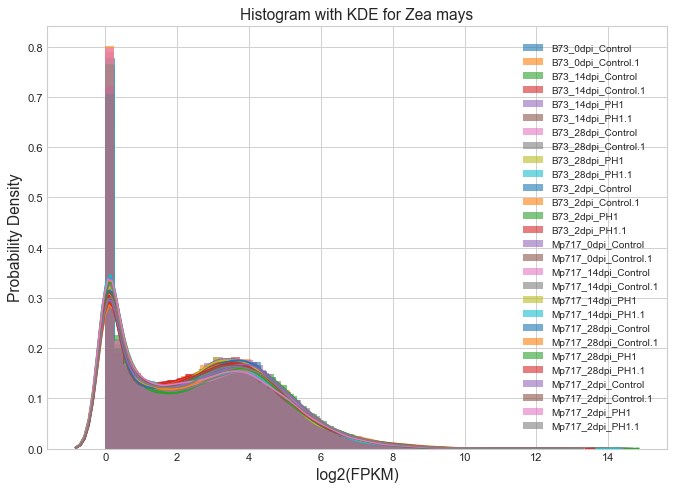

In [146]:
# Plot the distributions: values are log2 normalized 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    sample_data = df_nozeros[file].tolist()
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with KDE for Zea mays',fontsize=14);
plt.xlabel('log2(FPKM)',fontsize=14);
plt.ylabel('Probability Density',fontsize=14);
plt.legend(loc='center right',fontsize=9)    
#plt.savefig("../plots/all_infected_KDE_17zeros_drop.png");

### Based on the stats gotten we apply some cutoff thresholds
average of Q1:xxxx <br>
average of Q2: 2.50629206992992 <br>
average of Q3: xxxx <br>

In [147]:
# df1 has the Gene headers required for additional trimming
df1.shape
# df_nozeros is prepared to plot distributions which don't have Gene headers
#df_nozeros.shape

(33480, 30)

In [148]:
def filter_df(df, *args):

    # Filter a dataframe by the value of a column 
    # Input: df is the dataframe, *args are the criteria to filter
    # output: a new dataframe filtered 
    
    for k, v in args:
        df_cut = df[df[k] >= v]
    return df_cut

In [149]:
## Filter is looking for genes with 8 ceros across samples (we have 8 samples)

size_original = len(df_nozeros)
print(size_original)
cut_value = 2.506 
b_first=True

from collections import defaultdict
dict_cut = defaultdict(list)
#print(dict_cut)
#print(sample_lst)

for sample in sample_lst:
    #print(sample)
    if b_first:
        df_cut = filter_df(df1, (sample, cut_value))
        size_new = len(df_cut)
        size = size_original - size_new
        #print('Removed from '+ sample,str(size))
        b_first = False       
        dict_cut['sample'].append(sample)
        dict_cut['genes_cut'].append(size)
        
    else:
        df_cut = filter_df(df_cut, (sample, cut_value))
        size_new = len(df_cut)
        size = size_original - size_new
        #print('Removed from '+ sample,str(size))
        dict_cut['sample'].append(sample)
        dict_cut['genes_cut'].append(size)
        
df_cut_stats = pd.DataFrame(dict_cut)
print(len(df_cut))
df_cut.head(5)

33480
10860


,Gene,B73_28dpi_Control,B73_2dpi_Control,Mp717_0dpi_Control,Mp717_2dpi_Control,B73_2dpi_PH1,Mp717_2dpi_PH1,B73_14dpi_Control,Mp717_14dpi_Control,B73_14dpi_PH1,...,B73_14dpi_PH1.1,Mp717_14dpi_PH1.1,B73_28dpi_PH1,Mp717_28dpi_PH1,B73_28dpi_Control.1,Mp717_28dpi_Control.1,B73_28dpi_PH1.1,Mp717_28dpi_PH1.1,B73_0dpi_Control.1,zero-counter
1,Zm00001d007718,5.278304,9.169529,6.316247,9.754754,6.035712,9.674932,7.896454,9.151625,7.431840,...,5.708756,8.433431,8.419450,6.452449,8.403941,5.920877,8.799278,5.848287,9.251037,0
4,Zm00001d018986,4.753460,5.501713,4.680538,5.231436,4.651706,4.741871,4.846894,4.964930,5.087055,...,5.813437,4.655392,5.199174,5.200708,5.558770,4.814089,5.586380,4.797532,5.058550,0
5,Zm00001d048402,5.239925,6.194775,5.328097,6.099565,4.669378,6.049914,5.072200,5.700015,6.196806,...,6.050654,5.261636,6.442424,5.720043,6.488711,5.434852,6.049533,5.869067,6.565914,0
6,Zm00001d048403,5.241459,5.207780,5.412158,5.741329,5.125019,4.847977,5.380937,5.195871,5.633228,...,5.314979,4.812390,5.047045,5.338025,5.529306,5.561042,4.940998,5.563298,5.733647,0
12,Zm00001d048393,4.483377,3.560189,4.448286,3.457273,4.235520,5.466441,4.264664,5.084949,2.653214,...,3.417222,3.098622,3.697084,3.521038,3.736843,3.265237,3.563048,3.560311,3.342057,0


In [150]:
#sample_lst
df_cut.where(df_cut[sample_lst] < 2.506).any()

Gene                     False
B73_28dpi_Control        False
B73_2dpi_Control         False
Mp717_0dpi_Control       False
Mp717_2dpi_Control       False
B73_2dpi_PH1             False
Mp717_2dpi_PH1           False
B73_14dpi_Control        False
Mp717_14dpi_Control      False
B73_14dpi_PH1            False
Mp717_14dpi_PH1          False
B73_0dpi_Control         False
Mp717_28dpi_Control      False
B73_2dpi_Control.1       False
Mp717_0dpi_Control.1     False
Mp717_2dpi_Control.1     False
B73_2dpi_PH1.1           False
Mp717_2dpi_PH1.1         False
B73_14dpi_Control.1      False
Mp717_14dpi_Control.1    False
B73_14dpi_PH1.1          False
Mp717_14dpi_PH1.1        False
B73_28dpi_PH1            False
Mp717_28dpi_PH1          False
B73_28dpi_Control.1      False
Mp717_28dpi_Control.1    False
B73_28dpi_PH1.1          False
Mp717_28dpi_PH1.1        False
B73_0dpi_Control.1       False
zero-counter             False
dtype: bool

In [151]:
#df_cut.to_csv('matrix/all_28ceros_drop_Q2cut.csv', sep='\t', index=False)

In [152]:
df_cut.head(3)

,Gene,B73_28dpi_Control,B73_2dpi_Control,Mp717_0dpi_Control,Mp717_2dpi_Control,B73_2dpi_PH1,Mp717_2dpi_PH1,B73_14dpi_Control,Mp717_14dpi_Control,B73_14dpi_PH1,...,B73_14dpi_PH1.1,Mp717_14dpi_PH1.1,B73_28dpi_PH1,Mp717_28dpi_PH1,B73_28dpi_Control.1,Mp717_28dpi_Control.1,B73_28dpi_PH1.1,Mp717_28dpi_PH1.1,B73_0dpi_Control.1,zero-counter
1,Zm00001d007718,5.278304,9.169529,6.316247,9.754754,6.035712,9.674932,7.896454,9.151625,7.431840,...,5.708756,8.433431,8.419450,6.452449,8.403941,5.920877,8.799278,5.848287,9.251037,0
4,Zm00001d018986,4.753460,5.501713,4.680538,5.231436,4.651706,4.741871,4.846894,4.964930,5.087055,...,5.813437,4.655392,5.199174,5.200708,5.558770,4.814089,5.586380,4.797532,5.058550,0
5,Zm00001d048402,5.239925,6.194775,5.328097,6.099565,4.669378,6.049914,5.072200,5.700015,6.196806,...,6.050654,5.261636,6.442424,5.720043,6.488711,5.434852,6.049533,5.869067,6.565914,0


In [153]:
## Get some stats of the new matrix
df_tmp = df_cut.describe().T
df_tmp.drop(df_tmp.tail(1).index,inplace=True) # drop last 1 row containing the zero-counter

In [154]:
## set a header to the sample's column
df_tmp.reset_index(level=0, inplace=True)
df_tmp.rename(columns={'index': 'sample'}, inplace=True)
df_tmp.sort_values(['sample'], ascending=[True], inplace=True)  
df_tmp.head(5)
##df_tmp.to_csv("results/basic_stats_no_zeros_Q2cut.csv", index=False, header=True)

,sample,count,mean,std,min,25%,50%,75%,max
10,B73_0dpi_Control,10860.0,4.673653,1.256851,2.507975,3.761793,4.426879,5.319011,13.195769
27,B73_0dpi_Control.1,10860.0,4.847593,1.244755,2.536394,3.942465,4.615145,5.488848,13.527318
6,B73_14dpi_Control,10860.0,4.843613,1.239822,2.530688,3.941576,4.615249,5.482486,13.840316
17,B73_14dpi_Control.1,10860.0,4.699646,1.203378,2.511086,3.817158,4.486557,5.362922,12.273539
8,B73_14dpi_PH1,10860.0,4.680128,1.285550,2.508550,3.767207,4.422327,5.306794,13.703525


In [155]:
df_tmp

,sample,count,mean,std,min,25%,50%,75%,max
10,B73_0dpi_Control,10860.0,4.673653,1.256851,2.507975,3.761793,4.426879,5.319011,13.195769
27,B73_0dpi_Control.1,10860.0,4.847593,1.244755,2.536394,3.942465,4.615145,5.488848,13.527318
6,B73_14dpi_Control,10860.0,4.843613,1.239822,2.530688,3.941576,4.615249,5.482486,13.840316
17,B73_14dpi_Control.1,10860.0,4.699646,1.203378,2.511086,3.817158,4.486557,5.362922,12.273539
8,B73_14dpi_PH1,10860.0,4.680128,1.285550,2.508550,3.767207,4.422327,5.306794,13.703525
19,B73_14dpi_PH1.1,10860.0,4.615841,1.237491,2.506952,3.712439,4.388324,5.293684,12.820037
0,B73_28dpi_Control,10860.0,4.726812,1.206553,2.549065,3.844428,4.521914,5.373402,13.645253
23,B73_28dpi_Control.1,10860.0,4.787400,1.274578,2.512614,3.861340,4.553139,5.449841,13.760751
21,B73_28dpi_PH1,10860.0,4.762740,1.233725,2.507247,3.867859,4.541001,5.427452,13.561419
25,B73_28dpi_PH1.1,10860.0,4.657938,1.184632,2.521649,3.798476,4.467384,5.300202,13.473072


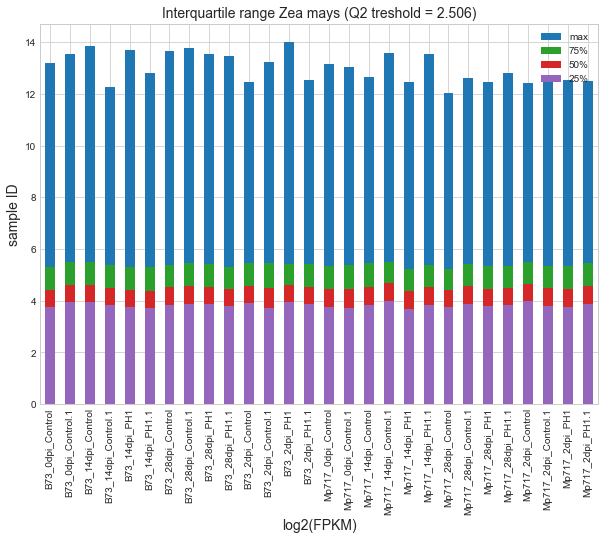

In [156]:
ax = df_tmp.plot(x="sample", y="max", kind="bar", figsize=(10,7))
df_tmp.plot(x="sample", y="75%", kind="bar", ax=ax, color="C2")
df_tmp.plot(x="sample", y="50%", kind="bar", ax=ax, color="C3")
df_tmp.plot(x="sample", y="25%", kind="bar", ax=ax, color="C4")
plt.title('Interquartile range Zea mays (Q2 treshold = 2.506)',fontsize=14);
plt.xlabel('log2(FPKM)',fontsize=14);
plt.ylabel('sample ID',fontsize=14);

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


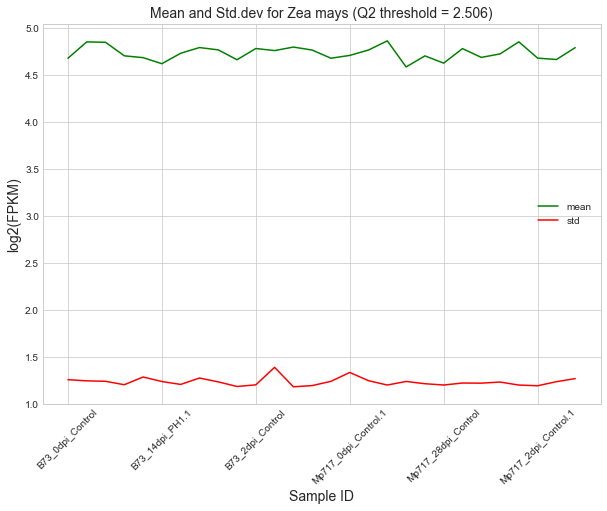

In [157]:
## gca stands for 'get current axis'
ax = plt.gca()
df_tmp.plot(kind='line',x='sample',y='mean',color='green', ax=ax,  figsize=(10,7))
df_tmp.plot(kind='line',x='sample',y='std', color='red', ax=ax)
plt.title('Mean and Std.dev for Zea mays (Q2 threshold = 2.506)',fontsize=14);
plt.xlabel('Sample ID',fontsize=14);
plt.ylabel('log2(FPKM)',fontsize=14);
plt.xticks(rotation=45);

In [158]:
# load file : format df to plot distributions

df_nozeros=pd.read_csv("matrix/all_28ceros_drop_Q2cut.csv", sep='\t')
## remove unnamed cols
df_nozeros.drop(df_nozeros.columns[df_nozeros.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
# dropping not-useful columns 
df_nozeros.drop(["Gene", "zero-counter"], axis = 1, inplace = True) 
print(df_nozeros.head(3))

   B73_28dpi_Control  B73_2dpi_Control  Mp717_0dpi_Control  \
0           5.278304          9.169529            6.316247   
1           4.753460          5.501713            4.680538   
2           5.239925          6.194775            5.328097   

   Mp717_2dpi_Control  B73_2dpi_PH1  Mp717_2dpi_PH1  B73_14dpi_Control  \
0            9.754754      6.035712        9.674932           7.896454   
1            5.231436      4.651706        4.741871           4.846894   
2            6.099565      4.669378        6.049914           5.072200   

   Mp717_14dpi_Control  B73_14dpi_PH1  Mp717_14dpi_PH1  ...  \
0             9.151625       7.431840         5.101537  ...   
1             4.964930       5.087055         5.407519  ...   
2             5.700015       6.196806         6.437809  ...   

   Mp717_14dpi_Control.1  B73_14dpi_PH1.1  Mp717_14dpi_PH1.1  B73_28dpi_PH1  \
0               8.052351         5.708756           8.433431       8.419450   
1               5.180601         5.813437  

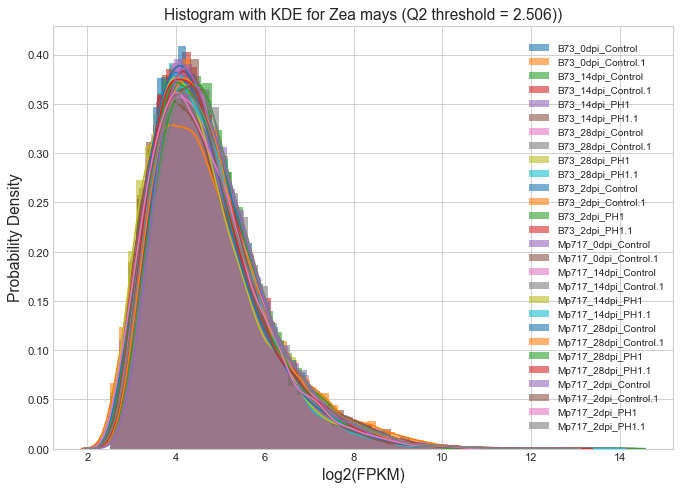

In [159]:
# Plot the distributions: values are log2 normalized 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    sample_data = df_nozeros[file].tolist()
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with KDE for Zea mays (Q2 threshold = 2.506))',fontsize=14);
plt.xlabel('log2(FPKM)',fontsize=14);
plt.ylabel('Probability Density',fontsize=14);
plt.legend(loc='center right',fontsize=9) 

In [160]:
# We would expect True, if gene names are repetead
df_cut.duplicated(subset=['Gene']).tail(50)   #.any()

34287    False
34293    False
34296    False
34301    False
34304    False
34306    False
34308    False
34315    False
34326    False
34327    False
34328    False
34330    False
34331    False
34336    False
34338    False
34340    False
34341    False
34345    False
34347    False
34351    False
34358    False
34359    False
34363    False
34364    False
34366    False
34371    False
34374    False
34375    False
34378    False
34380    False
34383    False
34384    False
34390    False
34391    False
34393    False
34396    False
34399    False
34400    False
34404    False
34405    False
34407    False
34410    False
34417    False
34420    False
34421    False
34424    False
34428    False
34429    False
34432    False
34442    False
dtype: bool

In [161]:
df_cut.loc[34380]['Gene']


'Zm00001d013627_1'

In [162]:
df_cut.loc[df_cut['Gene'] == 'Zm00001d013627']

,Gene,B73_28dpi_Control,B73_2dpi_Control,Mp717_0dpi_Control,Mp717_2dpi_Control,B73_2dpi_PH1,Mp717_2dpi_PH1,B73_14dpi_Control,Mp717_14dpi_Control,B73_14dpi_PH1,...,B73_14dpi_PH1.1,Mp717_14dpi_PH1.1,B73_28dpi_PH1,Mp717_28dpi_PH1,B73_28dpi_Control.1,Mp717_28dpi_Control.1,B73_28dpi_PH1.1,Mp717_28dpi_PH1.1,B73_0dpi_Control.1,zero-counter
27455,Zm00001d013627,4.05372,4.02925,4.003431,4.784242,4.57703,5.119921,4.276824,4.722083,3.283787,...,3.708761,3.73813,3.948694,3.595325,3.906333,4.173743,3.662103,3.724879,4.611279,0


In [163]:
df_cut.loc[34383]['Gene']

'Zm00001d025734_3'

In [164]:
df_cut.loc[df_cut['Gene'] == 'Zm00001d025734']


,Gene,B73_28dpi_Control,B73_2dpi_Control,Mp717_0dpi_Control,Mp717_2dpi_Control,B73_2dpi_PH1,Mp717_2dpi_PH1,B73_14dpi_Control,Mp717_14dpi_Control,B73_14dpi_PH1,...,B73_14dpi_PH1.1,Mp717_14dpi_PH1.1,B73_28dpi_PH1,Mp717_28dpi_PH1,B73_28dpi_Control.1,Mp717_28dpi_Control.1,B73_28dpi_PH1.1,Mp717_28dpi_PH1.1,B73_0dpi_Control.1,zero-counter


In [165]:
## checking for duplicates 
print(len(df_cut))
dups_genes = df_cut.pivot_table(index=['Gene'], aggfunc='size')
print (len(dups_genes))
print (dups_genes)

10860
10860
Gene
Zm00001d000004    1
Zm00001d000021    1
Zm00001d000029    1
Zm00001d000030    1
Zm00001d000041    1
                 ..
Zm00001d054089    1
Zm00001d054096    1
Zm00001d054105    1
Zm00001d054106    1
Zm00001d054107    1
Length: 10860, dtype: int64


In [166]:
df_cut.pivot_table(index=['Gene'], aggfunc='size')

Gene
Zm00001d000004    1
Zm00001d000021    1
Zm00001d000029    1
Zm00001d000030    1
Zm00001d000041    1
                 ..
Zm00001d054089    1
Zm00001d054096    1
Zm00001d054105    1
Zm00001d054106    1
Zm00001d054107    1
Length: 10860, dtype: int64